In [2]:
# === CELL 1: Import & Load Dataset ===

import pandas as pd
import numpy as np
import ast

# Ubah path ini kalau file kamu beda lokasi
DATASET_PATH = "dataset/dataset450_indonesia.csv"

df = pd.read_csv(DATASET_PATH)
print(df.shape)
df.head()


(500, 15)


,No,Nama_Menu,Kategori,Kalori,Sumber_Karbohidrat,Deskripsi_Menu,Karbo_List,corpus,Karbo_Clean,Nama_Lower,Deskripsi_Lower,Keyword_Semantik,enhanced_corpus,enhanced_corpus_mccbf,corpus_rf
0,1,Dori Cabe Garam,ikan,395,jagung nasi merah nasi putih,ikan dori tumis rasa pedas gurih rendah minyak,"['nasi', 'putih', 'jagung', 'merah']",dori cabe garam ikan jagung nasi merah nasi pu...,"jagung, nasi merah, nasi putih",dori cabe garam,ikan dori tumis rasa pedas gurih rendah minyak,protein_ikan,dori cabe garam ikan jagung putih nasi merah i...,dori cabe garam ikan dori tumis rasa pedas gur...,dori cabe garam ikan dori tumis rasa pedas gur...
1,2,Sempol Ayam Panggang,ayam,395,kentang ubi nasi merah nasi putih,ayam olahan panggang tinggi protein snack sehat,"['nasi', 'merah', 'ubi', 'putih', 'kentang']",sempol ayam grill ayam kentang ubi nasi merah ...,"kentang, ubi, nasi merah, nasi putih",sempol ayam panggang,ayam olahan panggang tinggi protein snack sehat,protein_ayam panggang,sempol ayam panggang ayam kentang putih nasi u...,sempol ayam panggang ayam olahan panggang ting...,sempol ayam panggang ayam olahan panggang ting...
2,3,Soto Ayam Spesial,ayam,400,kentang nasi merah nasi putih,soto ayam kuah bening tanpa santan lauk lengkap,"['nasi', 'putih', 'kentang', 'merah']",soto ayam spesial ayam kentang nasi merah nasi...,"kentang, nasi merah, nasi putih",soto ayam spesial,soto ayam kuah bening tanpa santan lauk lengkap,protein_ayam,soto ayam spesial ayam merah putih kentang nas...,soto ayam spesial soto ayam kuah bening tanpa ...,soto ayam spesial soto ayam kuah bening tanpa ...
3,4,Sapi Yakiniku,sapi,395,jagung nasi merah nasi putih,daging sapi yakiniku tumis sayur saus gurih,"['nasi', 'putih', 'jagung', 'merah']",beef yakiniku sapi jagung nasi merah nasi puti...,"jagung, nasi merah, nasi putih",sapi yakiniku,daging sapi yakiniku tumis sayur saus gurih,protein_sapi,sapi yakiniku sapi jagung putih nasi merah dag...,sapi yakiniku daging sapi yakiniku tumis sayur...,sapi yakiniku daging sapi yakiniku tumis sayur...
4,5,Rawon Surabaya,sapi,400,kentang nasi merah nasi putih,daging rawon empuk kuah rempah lauk tempe,"['nasi', 'putih', 'kentang', 'merah']",rawon surabaya sapi kentang nasi merah nasi pu...,"kentang, nasi merah, nasi putih",rawon surabaya,daging rawon empuk kuah rempah lauk tempe,NaN,rawon surabaya sapi merah putih kentang nasi d...,rawon surabaya daging rawon empuk kuah rempah ...,rawon surabaya daging rawon empuk kuah rempah ...


In [3]:
# === CELL 2: Tabel 4.1 - Atribut Dataset ===

info_data = {
    "Nama Atribut": [
        "Nama_Menu",
        "Deskripsi_Menu",
        "Kalori",
        "Karbo",
        "Kategori",
        "Karbo_List",
        "Enhanced_Corpus"
    ],
    "Tipe Data": [
        "String",
        "String",
        "Integer/Float",
        "String",
        "String",
        "List/String",
        "String"
    ],
    "Deskripsi": [
        "Nama hidangan yang disediakan oleh katering",
        "Deskripsi singkat mengenai bahan atau cara masak",
        "Jumlah kalori (kcal) per porsi",
        "Daftar karbohidrat dalam format teks mentah",
        "Jenis lauk (ayam, sapi, ikan, vegetarian)",
        "Hasil normalisasi karbohidrat dalam bentuk list terstruktur",
        "Gabungan nama menu dengan keyword semantik untuk TF-IDF"
    ]
}

tabel_atribut = pd.DataFrame(info_data)
tabel_atribut


,Nama Atribut,Tipe Data,Deskripsi
0,Nama_Menu,String,Nama hidangan yang disediakan oleh katering
1,Deskripsi_Menu,String,Deskripsi singkat mengenai bahan atau cara masak
2,Kalori,Integer/Float,Jumlah kalori (kcal) per porsi
3,Karbo,String,Daftar karbohidrat dalam format teks mentah
4,Kategori,String,"Jenis lauk (ayam, sapi, ikan, vegetarian)"
5,Karbo_List,List/String,Hasil normalisasi karbohidrat dalam bentuk lis...
6,Enhanced_Corpus,String,Gabungan nama menu dengan keyword semantik unt...


In [7]:
# === CELL 3: Tabel 4.2 - Contoh Data Mentah ===

kolom_mentah = [
    "Nama_Menu",
    "Deskripsi_Menu",
    "Kalori",
    "Sumber_Karbohidrat",   # GANTI Karbo → Sumber_Karbohidrat
    "Kategori"
]

tabel_mentah = df[kolom_mentah].head(4)
tabel_mentah


,Nama_Menu,Deskripsi_Menu,Kalori,Sumber_Karbohidrat,Kategori
0,Dori Cabe Garam,ikan dori tumis rasa pedas gurih rendah minyak,395,jagung nasi merah nasi putih,ikan
1,Sempol Ayam Panggang,ayam olahan panggang tinggi protein snack sehat,395,kentang ubi nasi merah nasi putih,ayam
2,Soto Ayam Spesial,soto ayam kuah bening tanpa santan lauk lengkap,400,kentang nasi merah nasi putih,ayam
3,Sapi Yakiniku,daging sapi yakiniku tumis sayur saus gurih,395,jagung nasi merah nasi putih,sapi


In [6]:
df.columns


Index(['No', 'Nama_Menu', 'Kategori', 'Kalori', 'Sumber_Karbohidrat',
       'Deskripsi_Menu', 'Karbo_List', 'corpus', 'Karbo_Clean', 'Nama_Lower',
       'Deskripsi_Lower', 'Keyword_Semantik', 'enhanced_corpus',
       'enhanced_corpus_mccbf', 'corpus_rf'],
      dtype='object')

In [8]:
kolom_bersih = [
    "Nama_Menu",
    "Karbo_List",
    "enhanced_corpus"
]

tabel_bersih = df[kolom_bersih].head(4)
tabel_bersih


,Nama_Menu,Karbo_List,enhanced_corpus
0,Dori Cabe Garam,"['nasi', 'putih', 'jagung', 'merah']",dori cabe garam ikan jagung putih nasi merah i...
1,Sempol Ayam Panggang,"['nasi', 'merah', 'ubi', 'putih', 'kentang']",sempol ayam panggang ayam kentang putih nasi u...
2,Soto Ayam Spesial,"['nasi', 'putih', 'kentang', 'merah']",soto ayam spesial ayam merah putih kentang nas...
3,Sapi Yakiniku,"['nasi', 'putih', 'jagung', 'merah']",sapi yakiniku sapi jagung putih nasi merah dag...


In [11]:
pd.set_option('display.max_colwidth', None)

tabel_compare = df[[
    "Nama_Menu",
    "Sumber_Karbohidrat",
    "Karbo_List",
    "Deskripsi_Menu"
]].head(4)

tabel_compare


,Nama_Menu,Sumber_Karbohidrat,Karbo_List,Deskripsi_Menu
0,Dori Cabe Garam,jagung nasi merah nasi putih,"['nasi', 'putih', 'jagung', 'merah']",ikan dori tumis rasa pedas gurih rendah minyak
1,Sempol Ayam Panggang,kentang ubi nasi merah nasi putih,"['nasi', 'merah', 'ubi', 'putih', 'kentang']",ayam olahan panggang tinggi protein snack sehat
2,Soto Ayam Spesial,kentang nasi merah nasi putih,"['nasi', 'putih', 'kentang', 'merah']",soto ayam kuah bening tanpa santan lauk lengkap
3,Sapi Yakiniku,jagung nasi merah nasi putih,"['nasi', 'putih', 'jagung', 'merah']",daging sapi yakiniku tumis sayur saus gurih


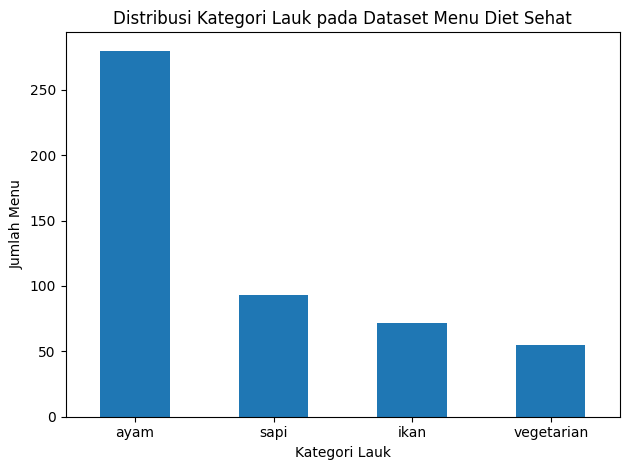

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset/dataset450_indonesia.csv")

# Hitung distribusi kategori
kategori_counts = df['Kategori'].value_counts()

# Plot bar chart
plt.figure()
kategori_counts.plot(kind='bar')
plt.title('Distribusi Kategori Lauk pada Dataset Menu Diet Sehat')
plt.xlabel('Kategori Lauk')
plt.ylabel('Jumlah Menu')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


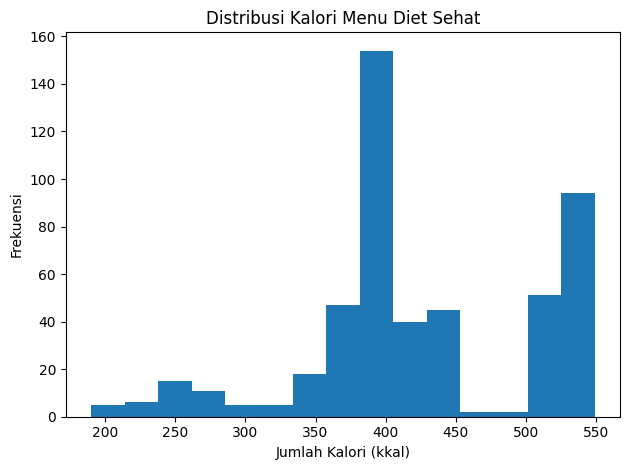

In [3]:
# Plot distribusi kalori
plt.figure()
plt.hist(df['Kalori'], bins=15)
plt.title('Distribusi Kalori Menu Diet Sehat')
plt.xlabel('Jumlah Kalori (kkal)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()
